First of all checking the version of tensorflow using the following code.

In [87]:
import tensorflow as tf
tf.__version__

'2.8.0'

Now, it's time to load the dataset

In [88]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

As can be seen from the above code, the dataset was divided into train and test sets. Let's take a look at the X_train

In [89]:
print('X_train :',X_train.shape)
print('X_test :',X_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)

X_train : (60000, 28, 28)
X_test : (10000, 28, 28)
y_train : (60000,)
y_test : (10000,)


As it is clear, the train dataset (`X_train`) contains 60,000 images of size 28 x 28. We can visualize one of the images using the following code:

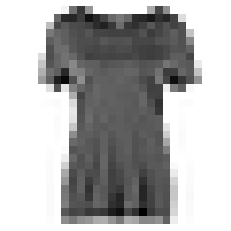

In [90]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sample_image = X_train[10]
plt.imshow(sample_image, cmap='binary')
plt.axis('off')
plt.show()

The `y_train` also includes values between 0 and 9. Each represents a particular category. For example, we can check the value of `y_train` for the above image.

In [91]:
y_train[10]

0

The above code shows that the image belongs to category 0. To get the associated label with each category, you can use the following code:

In [92]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[y_train[10]])

T-shirt/top


## First Scaling the values of image to a range of 0 to 1. To do so, we divide the values by 255.

In [8]:
X_train_norm = X_train / 255.0

X_test_norm = X_test / 255.0
print(X_test_norm.shape)

(10000, 28, 28)


### Verifing that the data is in the correct format, let's display the first 25 images from the training set and display the class name below each image.

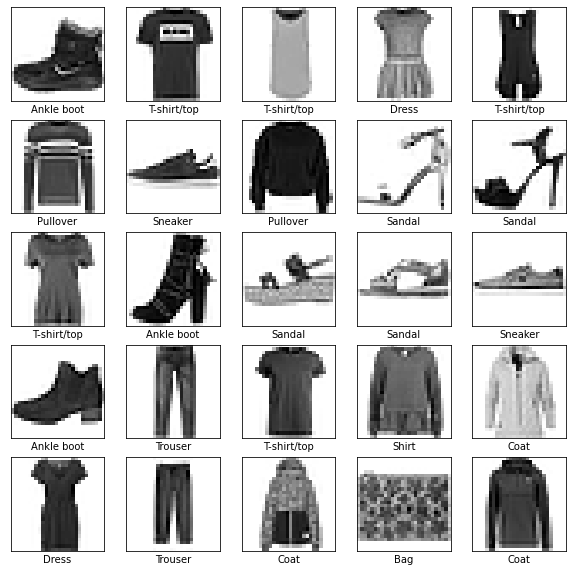

In [192]:
plt.figure(figsize=(10,10))
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

**The above plot of the first 25 images in the dataset shows that indeed the images are grayscale photographs of items of clothing.**

# Now using KNN to train our 1st model  

**K-Nearest Neighbor Algorithm
K-Nearest Neighbor (or KNN) algorithm is a non-parametric classification algorithm. Backprop Neural Network is a parametric model parametrized by weights and bias values. Non-parametric model, contrary to the name, has a very large number of parameters. In the case of Fashion MNIST example, we will use the entire Train Set as parameters of KNN.**

**The basic idea behind KNN is simple. Given a (test) vector or image to classify or label, find  k  vectors or images in Train Set that are "closest" to the (test) vector or image. With the  k  closest vectors or images, there are  k  labels. Assign the most frequent label of  k  labels to the (test) vector or image.**

In [10]:
# importing model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [11]:
# Reshape the training and test data sets so that images of size (m, num_px, num_px) are flattened into single vectors of shape (m, num_px  ∗  num_px ).
X_train_flat=X_train_norm.reshape(X_train_norm.shape[0], -1)
X_test_flat=X_test_norm.reshape(X_test_norm.shape[0], -1)

print('X_train_flat shape = ', X_train_flat.shape)
print('X_test_flat shape = ', X_test_flat.shape)
print('y_train shape = ', y_train.shape)
print('y_test shape = ', y_test.shape)

X_train_flat shape =  (60000, 784)
X_test_flat shape =  (10000, 784)
y_train shape =  (60000,)
y_test shape =  (10000,)


In [12]:
# initializing the model
model = KNeighborsClassifier(n_neighbors = 5) # Using k = 5

In [13]:
# training the model using X_train_flat and y_train
model.fit(X_train_flat, y_train)

KNeighborsClassifier()

In [14]:
# Now calculating the confidence
confidence = model.score(X_test_flat, y_test)
print(confidence)

0.8554


**Complexity:  
The complexity of KNN for this example is quite high: for each image in Test Set (there are 10000 of them), we compute 60000 metrics (one each for Train image). After populating an array of 60000 metrics, we scan through this array to identify  k  smallest metrics.**

### **Looking at the confidence, the model's confidence is 85% on prediciting the test data. Lets look at the accuracy of the model**

In [15]:
y_pred = model.predict(X_test_flat)
accuracy = accuracy_score(y_test, y_pred)
print("ACCURACY OF MODEL: ", accuracy)

ACCURACY OF MODEL:  0.8554


## **As we can see, the accuracy of out model is 85% which is pretty good. This mean that our model is performing good in test data set. We can easily use this model to make prediciton. Lets train our data using other supervised learning.**

# **Using single layer neural network with one neuron to train our model**

**The values of the target label are stored in a 1-dimensional array since essentially all the labels are represented as a single number. However, this kind of label representation is not the one that a Neural Network expect, so we need to turn this into one-hot representation before training the model**

In [16]:
from tensorflow.keras.utils import to_categorical
import numpy as np

# Convert y_train into one-hot format
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)
# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):    
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

In [17]:
# now lets check the shape of y_train and y_test
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [18]:
# Now lets initialize our model.
# first importing the modules
# now lets check the shape of y_train and y_test
import keras
from keras.layers import Dense, Flatten
from keras.models import Sequential
import numpy as np

In [19]:
#creating simple Neural Network model with 1 hidden layer with single neuron and output layer with 10 neurons as our class is 10
model2 = Sequential()
model2.add(Flatten(input_shape=(28,28)))
model2.add(Dense(1, activation = 'sigmoid'))
model2.add(Dense(10, activation = 'softmax'))

In [20]:
# Using the code below to see the detail of our Neural Network
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1)                 785       
                                                                 
 dense_1 (Dense)             (None, 10)                20        
                                                                 
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________


**From the above summary, we see that our neural network have total 805 trainable parameters. We train these parameter using backpropagation.**

In [21]:
#compiling the model
model2.compile(
    loss = 'categorical_crossentropy', # using categorical_crossentropy to calculate loss
    optimizer = 'adam', #using adam as optimizer.
    metrics = ['accuracy'] # using accuracy and precision as our metrics
)

**Now comes the fun part, training the model**

Epoch 1/20
1875/1875 [==============================] - 2s 985us/step - loss: 2.0917 - accuracy: 0.1992 - val_loss: 1.9576 - val_accuracy: 0.2241
Epoch 2/20
1875/1875 [==============================] - 2s 991us/step - loss: 1.8722 - accuracy: 0.2226 - val_loss: 1.8081 - val_accuracy: 0.2258
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.7679 - accuracy: 0.2169 - val_loss: 1.7428 - val_accuracy: 0.2105
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.7220 - accuracy: 0.2161 - val_loss: 1.7114 - val_accuracy: 0.2221
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6970 - accuracy: 0.2178 - val_loss: 1.7029 - val_accuracy: 0.2126
Epoch 6/20
1875/1875 [==============================] - 2s 923us/step - loss: 1.6731 - accuracy: 0.2511 - val_loss: 1.6584 - val_accuracy: 0.2736
Epoch 7/20
1875/1875 [==============================] - 2s 934us/step - loss: 1.6340 - accuracy: 0.2937 - val_loss: 1.6238 - val_a

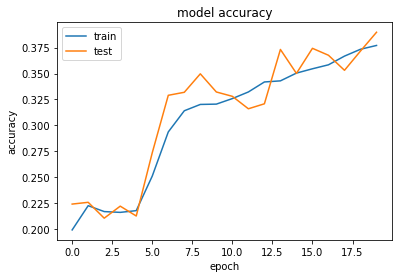

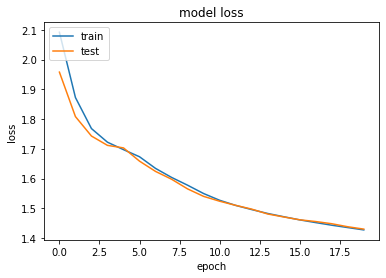

In [22]:
history2 = model2.fit(X_train_norm, y_train, epochs = 20, validation_data=(X_test_norm,y_test))
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **The model is performing much worst than KNN. The accuracy is just 38%. Lets use a deep neural network to train our model.**

# Using ANN with 2 layer to train model

In [23]:
# importing modules
import keras
from keras.layers import Dense, Flatten
from keras.models import Sequential
import numpy as np

In [24]:
# printing shape of X_train and X_test
print('Size of X_train : ', X_train.shape)
print('Size of X_test : ', X_test.shape)

#printing shape of y_train and y_test
print('Size of y_train : ', y_train.shape)
print('Size of y_test : ', y_test.shape)

Size of X_train :  (60000, 28, 28)
Size of X_test :  (10000, 28, 28)
Size of y_train :  (60000, 10)
Size of y_test :  (10000, 10)


In [25]:
#creating simple Neural Network model with 2 layers each having  neurons.
model3 = Sequential()
model3.add(Flatten(input_shape=(28,28)))
model3.add(Dense(5, activation = 'relu'))
model3.add(Dense(5, activation = 'relu'))
model3.add(Dense(10, activation = 'softmax'))

In [26]:
# Using the code below to see the detail of our NEural Network
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 5)                 3925      
                                                                 
 dense_3 (Dense)             (None, 5)                 30        
                                                                 
 dense_4 (Dense)             (None, 10)                60        
                                                                 
Total params: 4,015
Trainable params: 4,015
Non-trainable params: 0
_________________________________________________________________


**As we can see, our model have total 3,985 trainable parameters. These parameter is tuned using the backpropagation.
Now after constructing the Neural Network classifier model, we need to compile it. We wil use categorical_crossentropy as loss, adam optimizer and accuracy to be passed in metrics argument in order to measure the performance of our classifier..**

In [27]:
model3.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy', 'Precision']
)

## Now training our Neural Network

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1757 - accuracy: 0.5728 - precision: 0.8397 - val_loss: 0.8637 - val_accuracy: 0.6721 - val_precision: 0.8127
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8071 - accuracy: 0.7012 - precision: 0.8173 - val_loss: 0.7737 - val_accuracy: 0.7194 - val_precision: 0.8230
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7223 - accuracy: 0.7441 - precision: 0.8377 - val_loss: 0.7106 - val_accuracy: 0.7493 - val_precision: 0.8365
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6706 - accuracy: 0.7646 - precision: 0.8495 - val_loss: 0.6755 - val_accuracy: 0.7614 - val_precision: 0.8469
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6425 - accuracy: 0.7749 - precision: 0.8528 - val_loss: 0.6557 - val_accuracy: 0.7682 - val_precision: 0.8483
Epoch 6/10
1875/1875 [==============================] - 2s 1

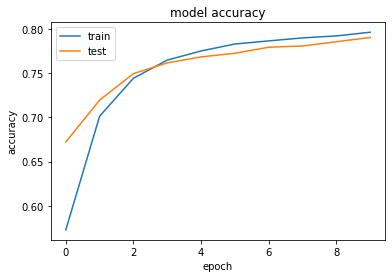

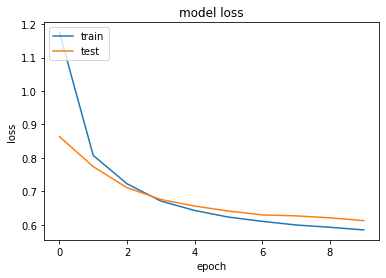

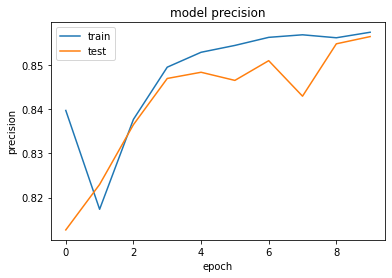

In [28]:
# using .fit() method on our model
history3 = model3.fit(X_train_norm, y_train, epochs = 10, validation_data=(X_test_norm,y_test))
# summarize history for accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for precision
plt.plot(history3.history['precision'])
plt.plot(history3.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **This model is performing far better than previous one. The accuracy is 87% which is very good. We can improve our model even more by using much deeper neural network.**

# Creating new model with more hidden layer. 

In [29]:
#creating Neural Network model with 7 layers
model4 = Sequential()
model4.add(Flatten(input_shape=(28,28)))
model4.add(Dense(64, activation = 'sigmoid'))
model4.add(Dense(128, activation = 'sigmoid'))
model4.add(Dense(256, activation = 'sigmoid'))
model4.add(Dense(256, activation = 'sigmoid'))
model4.add(Dense(128, activation = 'sigmoid'))
model4.add(Dense(64, activation = 'sigmoid'))
model4.add(Dense(10, activation = 'softmax'))

In [30]:
# Using the code below to see the detail of our Neural Network
model4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                50240     
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 256)               33024     
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dense_10 (Dense)            (None, 64)               

In [31]:
model4.compile(
    loss = keras.losses.binary_crossentropy,
    optimizer = 'adam',
    metrics = ['accuracy']
)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3285 - accuracy: 0.1002 - val_loss: 0.3259 - val_accuracy: 0.1000
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2243 - accuracy: 0.3630 - val_loss: 0.1612 - val_accuracy: 0.5454
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1450 - accuracy: 0.6102 - val_loss: 0.1275 - val_accuracy: 0.6870
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1123 - accuracy: 0.7362 - val_loss: 0.1034 - val_accuracy: 0.7765
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0906 - accuracy: 0.8051 - val_loss: 0.0938 - val_accuracy: 0.8049
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0825 - accuracy: 0.8289 - val_loss: 0.0812 - val_accuracy: 0.8379
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0764 - accuracy: 0.8478 - val_loss: 0.0849 - val_accuracy:

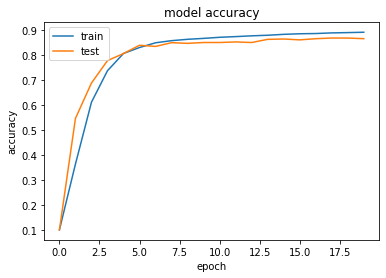

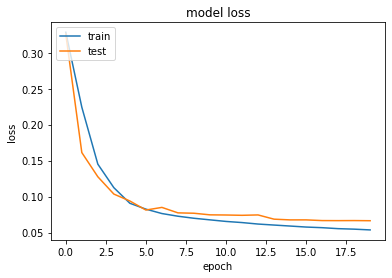

In [32]:
# using .fit() method on our model
history = model4.fit(X_train_norm, y_train, epochs = 20, validation_data=(X_test_norm,y_test))
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **The accuracy of this model is by far the best i.e. 89%. The model is performing very good on predicting data. Therefore, using this model to predict the data of our own. But first saving this model in h5 file format**

In [57]:
model4.save("best_model.h5")

**The entire model is saved in 'best_model.h5' file. Now we can simply use this model to predict the image.**

# Using the saved model to predict

In [116]:
from keras.models import load_model
import cv2 as cv
best_model = load_model('best_model.h5')
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps
import os

best_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

With a loaded model, it's time to generate predictions with our best model!

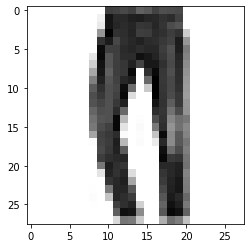

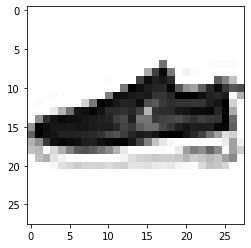

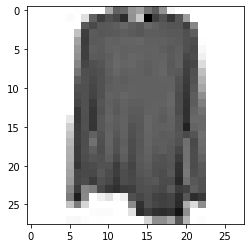

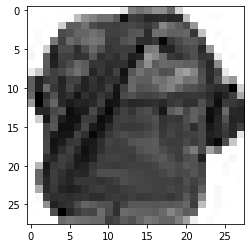

(4, 28, 28)


In [183]:
# A few random samples
use_samples = [5, 38, 3939, 8888]
samples_to_predict = []
# Generate plots for samples
for sample in use_samples:
    # Generate a plot
    reshaped_image = X_test[sample].reshape((28, 28))
    plt.imshow(reshaped_image, cmap='binary')
    plt.show()
    # Add sample to array for prediction
    samples_to_predict.append(X_test[sample])
    
# Convert into Numpy array
# before feeding them to the model, we convert our list into a Numpy array. 
# This allows us to compute shape and allows model to handle the data more smoothly:
samples_to_predict = np.array(samples_to_predict)
print(samples_to_predict.shape)


Above, The output of the print statement: (4, 28, 28).

We indeed added 4 images of 28x28 pixels with one channel per image.

The next step is to generate the predictions:

In [185]:
# Generate predictions for samples
predictions = best_model.predict(samples_to_predict)
print(predictions)

[[2.1907715e-08 9.9999988e-01 1.3450659e-09 4.0192827e-08 2.2071780e-09
  1.7799398e-12 8.4747434e-08 3.4908805e-12 6.0734888e-09 5.1339084e-09]
 [7.2417645e-09 8.2373018e-11 2.3106953e-12 9.5203038e-12 1.6331136e-10
  5.2338642e-06 6.9336994e-11 9.9999201e-01 9.9208592e-07 1.7249102e-06]
 [1.0553017e-03 3.2086417e-04 9.1196728e-01 1.3286810e-03 7.2166629e-02
  7.0454662e-06 1.2078424e-02 2.5700224e-08 1.0750396e-03 7.3937980e-07]
 [5.9819096e-05 8.5815003e-08 1.0571449e-06 1.1237713e-07 5.7453826e-07
  1.9800609e-06 6.0697030e-06 4.3663320e-07 9.9992979e-01 1.0307114e-07]]


As we used the Softmax activation function when creating our model. This activation function doesn't compute the prediction, but rather a discrete probability distribution over the target classes. This means that Softmax computes the probability that the input belongs to a particular class, for each class. The values in each row summate to 1 - or 100%, which is a characteristic of a valid probability distribution.

Now, we can finalize our work by actually finding out what our predicted classes are - by taking the argmax values (or "maximum argument", index of the maximum value) for each element in the list with predictions:

In [189]:
# Generate arg maxes for predictions
classes = np.argmax(predictions, axis = 1)
print(classes)

[1 7 2 8]


In [191]:
pred_name = []
for i in classes:
    print(class_names[i])
    pred_name.append(class_names[i])

Trouser
Sneaker
Pullover
Bag


As we can see above, our model predicted first image as Trouser, second as Sneaker, third as Pullover and fourth as bag which is indeed 100% correct. Therefore, our model is performing good in predicting unseen data as well.

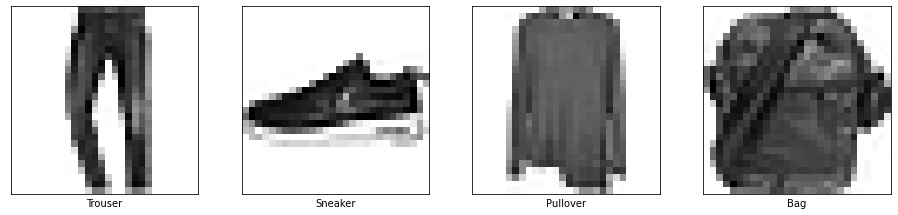

In [200]:
plt.figure(figsize=(20,20))
for i in range(4):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[use_samples[i]], cmap=plt.cm.binary)
    plt.xlabel(pred_name[i])
plt.show()

In this way, the model is trained and the best model is evaluated. Our best model was model4 which is trained in very deep neural network. The accuray of the model is 88%. 